In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
from IPython.display import clear_output
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
# Case 1: Prediction in RGB Color Space

In [4]:
# Model initializing
model = models.Sequential()

In [7]:
# Preparing the dataset
files = ['Consumable', 'Non-Consumable']
address = '/media/debrc/Data/Codings/Meat-Gradation-PROJ/Dataset/Chicken/'

In [8]:
# Loading the image files based on classifications
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(address+col)
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

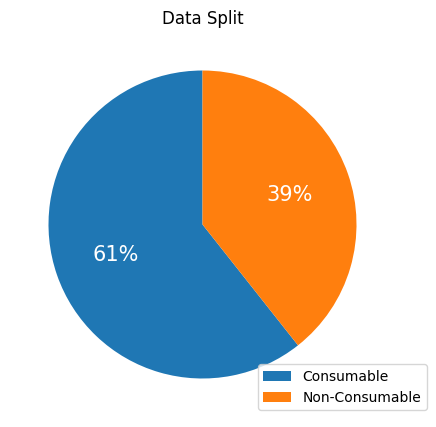

In [9]:
sizes = [len(data['Consumable']), len(data['Non-Consumable'])]
plt.figure(figsize=(10,5), dpi=100)
plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90)
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [10]:
width = 100
height = 100
# Making standard size for the different class
sample_size = 122

In [11]:
# Converting BGR Images to RGB Color Space
start = time.time()
image_data = []
image_target = []

for title in files:
    os.chdir(address+title)
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Calculate Time 29.29642


In [12]:
# Displaying the dimensionality of the array
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(244, 100, 100, 3)

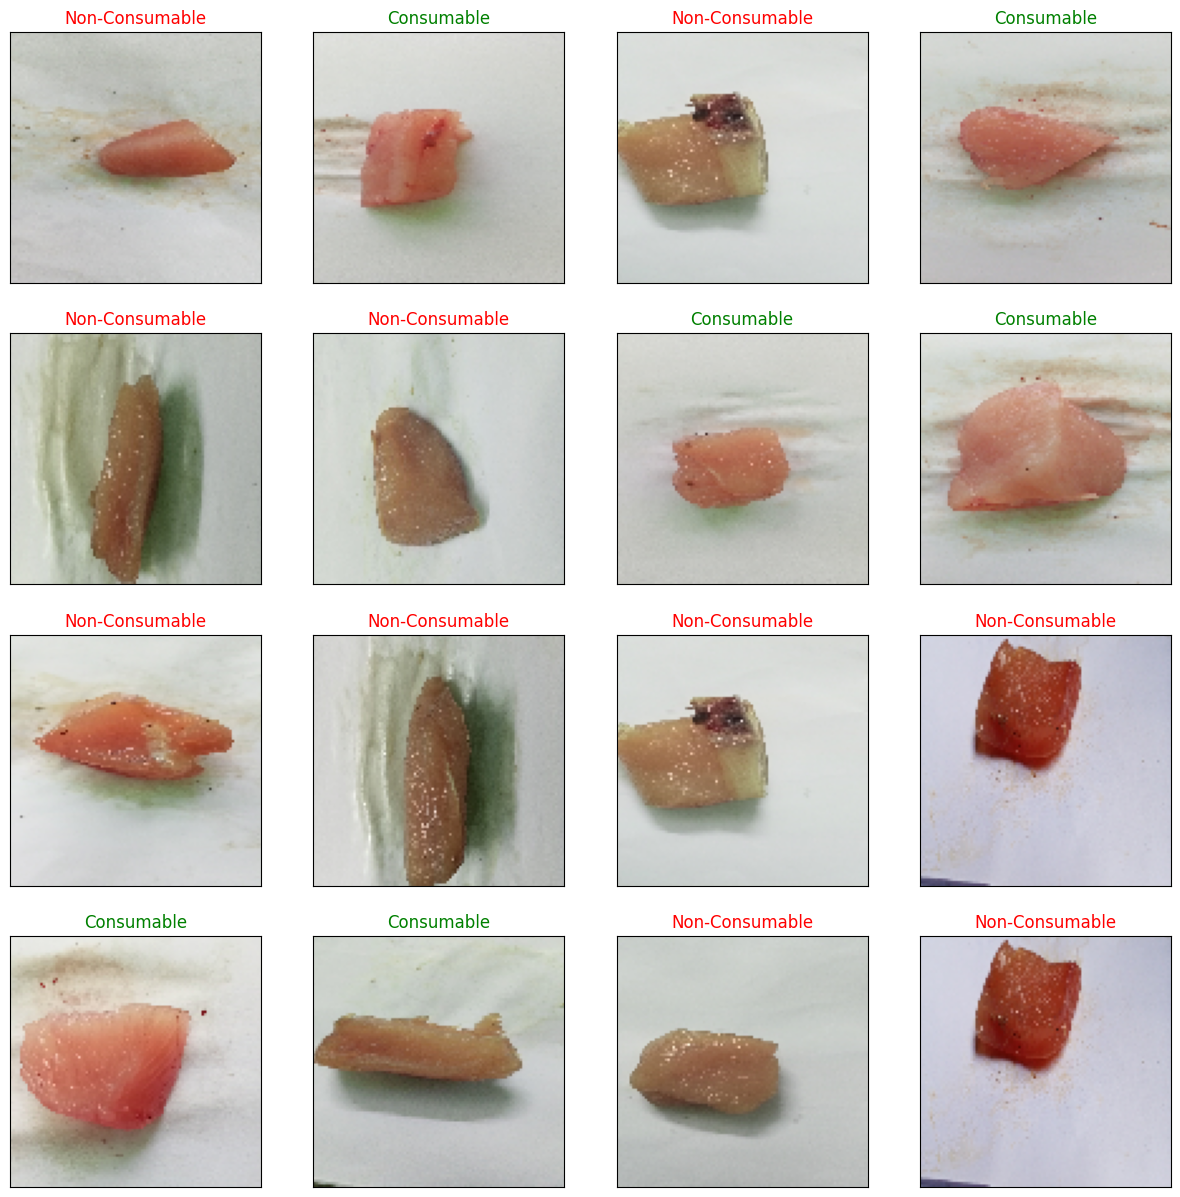

In [13]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Consumable':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
# Making labels for the data
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [15]:
# Transforming image_data rgb values within 0 to 1
X = image_data / 255.0
# Transforming labels to distinct integer values
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [16]:
# Preparing the model
model.add(layers.Conv2D(35, (3, 3), activation='relu', input_shape=(width,height,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [17]:
# Training model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
6/6 [==============================] - 3s 338ms/step - loss: 0.9289 - accuracy: 0.4765 - val_loss: 0.7117 - val_accuracy: 0.4730
Epoch 2/10
6/6 [==============================] - 2s 298ms/step - loss: 0.7066 - accuracy: 0.5176 - val_loss: 0.6910 - val_accuracy: 0.5270
Epoch 3/10
6/6 [==============================] - 2s 284ms/step - loss: 0.6972 - accuracy: 0.4824 - val_loss: 0.6867 - val_accuracy: 0.6622
Epoch 4/10
6/6 [==============================] - 2s 260ms/step - loss: 0.6964 - accuracy: 0.5412 - val_loss: 0.6947 - val_accuracy: 0.5541
Epoch 5/10
6/6 [==============================] - 2s 261ms/step - loss: 0.6787 - accuracy: 0.6059 - val_loss: 0.6619 - val_accuracy: 0.6892
Epoch 6/10
6/6 [==============================] - 2s 259ms/step - loss: 0.6555 - accuracy: 0.5647 - val_loss: 0.6330 - val_accuracy: 0.7568
Epoch 7/10
6/6 [==============================] - 2s 266ms/step - loss: 0.6433 - accuracy: 0.6412 - val_loss: 0.5587 - val_accuracy: 0.8784
Epoch 8/10
6/6 [====

3/3 - 0s - loss: 2.5950 - accuracy: 0.4865 - 178ms/epoch - 59ms/step


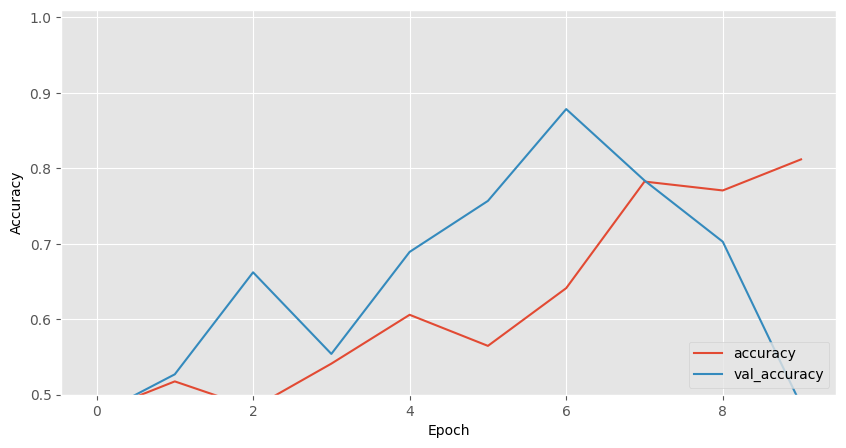

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [19]:
result=model.evaluate(test_images, test_labels)

3/3 [==============================] - 0s 46ms/step - loss: 2.5950 - accuracy: 0.4865


In [20]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 2.595032215118408
accuracy : 0.4864864945411682


3/3 [==============================] - 0s 46ms/step


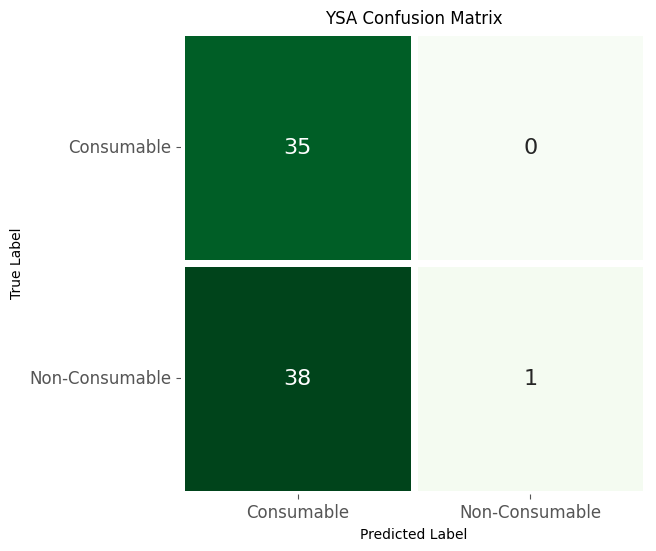

In [21]:
# Calculating Accuracy

y_pred = model.predict(test_images)

def toClass(pred):
    
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
        
    return class_

cm = confusion_matrix(test_labels,toClass(y_pred))

df1 = pd.DataFrame(columns=["Consumable","Non-Consumable"], index= ["Consumable","Non-Consumable"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()

In [22]:
# Case 2: Prediction in HSV Color Space

In [23]:
# Model initializing
model = models.Sequential()

In [26]:
# Preparing the dataset
files = ['Consumable', 'Non-Consumable']
address = '/media/debrc/Data/Codings/Meat-Gradation-PROJ/Dataset/Chicken/'

In [27]:
# Loading the image files based on classifications
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(address+col)
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

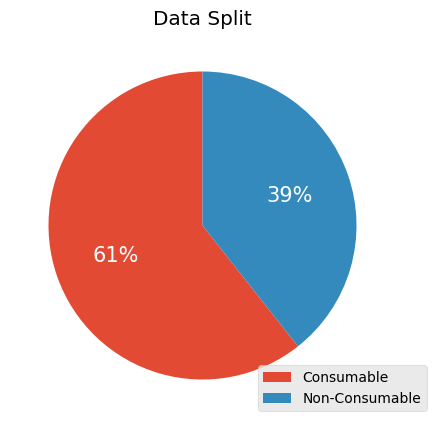

In [28]:
sizes = [len(data['Consumable']), len(data['Non-Consumable'])]
plt.figure(figsize=(10,5), dpi=100)
plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90)
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [29]:
width = 100
height = 100
# Making standard size for the different class
sample_size = 122

In [30]:
# Converting BGR Images to HSV Color Space
start = time.time()
image_data = []
image_target = []

for title in files:
    os.chdir(address+title)
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Calculate Time 28.53625


In [31]:
# Displaying the dimensionality of the array
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(244, 100, 100, 3)

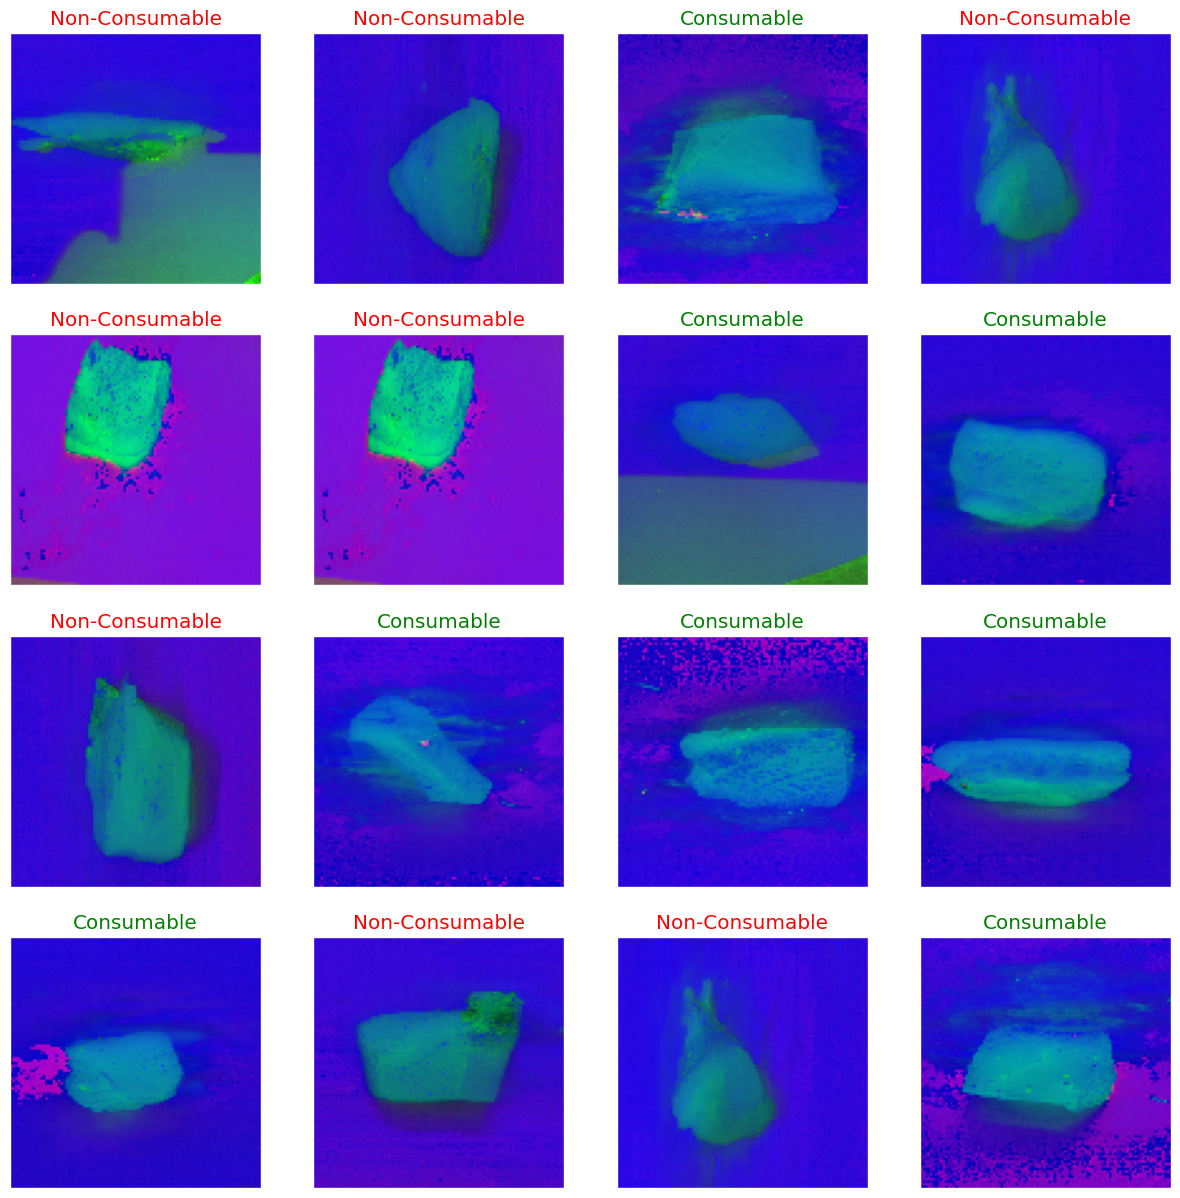

In [32]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Consumable':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [33]:
# Making labels for the data
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [34]:
# Transforming image_data rgb values within 0 to 1
X = image_data / 360.0
# Transforming labels to distinct integer values
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [35]:
# Preparing the model
model.add(layers.Conv2D(35, (3, 3), activation='relu', input_shape=(width,height,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [36]:
# Training model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
6/6 [==============================] - 3s 338ms/step - loss: 0.7978 - accuracy: 0.5647 - val_loss: 0.7075 - val_accuracy: 0.5270
Epoch 2/10
6/6 [==============================] - 2s 332ms/step - loss: 0.6896 - accuracy: 0.4824 - val_loss: 0.6367 - val_accuracy: 0.5270
Epoch 3/10
6/6 [==============================] - 2s 281ms/step - loss: 0.5954 - accuracy: 0.6000 - val_loss: 0.6351 - val_accuracy: 0.5946
Epoch 4/10
6/6 [==============================] - 2s 277ms/step - loss: 0.5858 - accuracy: 0.6647 - val_loss: 0.5298 - val_accuracy: 0.7973
Epoch 5/10
6/6 [==============================] - 2s 309ms/step - loss: 0.4975 - accuracy: 0.7529 - val_loss: 0.4804 - val_accuracy: 0.7297
Epoch 6/10
6/6 [==============================] - 2s 293ms/step - loss: 0.4789 - accuracy: 0.7529 - val_loss: 0.4349 - val_accuracy: 0.7838
Epoch 7/10
6/6 [==============================] - 2s 288ms/step - loss: 0.4237 - accuracy: 0.8176 - val_loss: 0.4279 - val_accuracy: 0.8243
Epoch 8/10
6/6 [====

3/3 - 0s - loss: 0.4051 - accuracy: 0.8243 - 175ms/epoch - 58ms/step


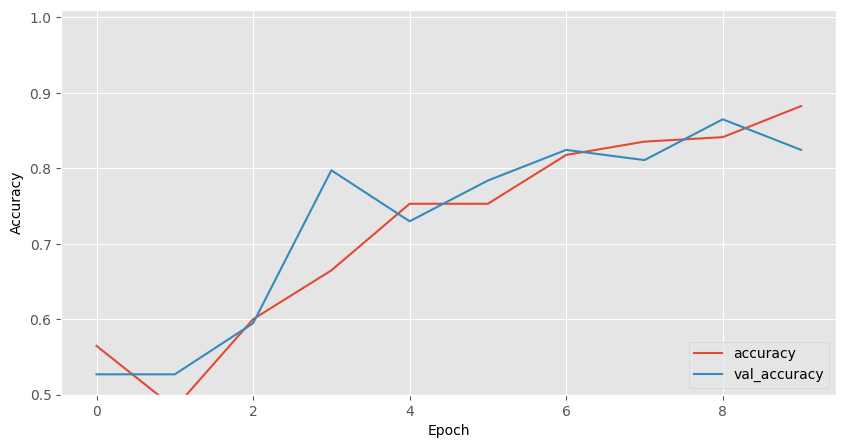

In [37]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [38]:
result=model.evaluate(test_images, test_labels)

3/3 [==============================] - 0s 43ms/step - loss: 0.4051 - accuracy: 0.8243


In [39]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.40510937571525574
accuracy : 0.8243243098258972


3/3 [==============================] - 0s 48ms/step


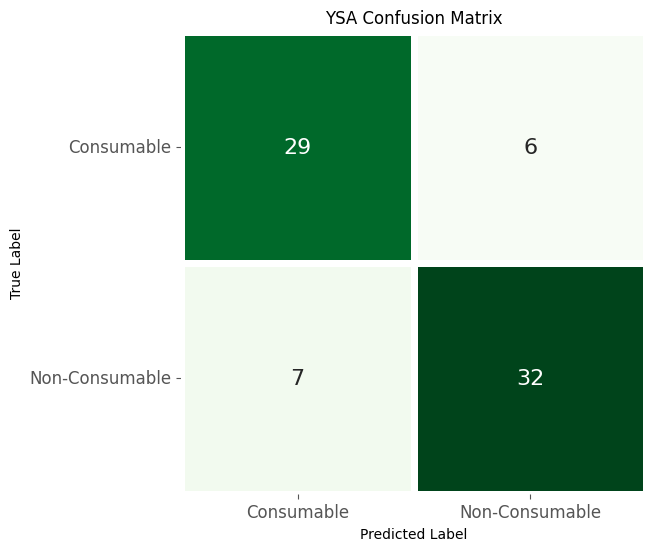

In [40]:
# Calculating Accuracy

y_pred = model.predict(test_images)

def toClass(pred):
    
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
        
    return class_

cm = confusion_matrix(test_labels,toClass(y_pred))

df1 = pd.DataFrame(columns=["Consumable","Non-Consumable"], index= ["Consumable","Non-Consumable"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()